In [1]:
#imports
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#1a
I1 = cv2.imread('images/cat1.jpg')
#topaja haha
I1 = cv2.cvtColor(I1, cv2.COLOR_RGB2BGR)
I2 = cv2.imread('images/cat2.jpg')
I2 = cv2.cvtColor(I2, cv2.COLOR_RGB2BGR)

def myhist3(I, bins):
    binSize = 256/bins
    H = np.zeros((bins,bins,bins)) #matrika/kocka ki ima po oseh RGB
    
    for i in np.arange(I.shape[0]):
        for j in np.arange(I.shape[1]):


            RGBvalues = I[i,j,:]  #izberemo RGB vrednosti posameznega px (npr (255,255,0) )
            indexX = int(RGBvalues[0] / binSize)  #indexX je bin RED torej 255/binsize  = bin npr 3
            indexY = int(RGBvalues[1] / binSize)
            indexZ = int(RGBvalues[2] / binSize)

            H[indexX,indexY,indexZ] += 1
            # if (i==0) and (j==0):
                # print(RGBvalues)
                # print(RGBvalues[0])

                # print("indexX", indexX)
                # print("indexY", indexY)
                # print("indexZ", indexZ)
                # print("H[indexX,indexY,indexZ]",H[indexX,indexY,indexZ])
                   
    H = H / sum(sum(sum(H)))
    return H


            
H1 = myhist3(I1,8)
H2 = myhist3(I2,8)







In [3]:
#1b
I = cv2.imread('images/cat1.jpg')
I = cv2.cvtColor(I, cv2.COLOR_RGB2BGR)

def compare_histograms(H1,H2,vrsta):
    if(vrsta == 'L2'):
        return np.sqrt(sum((H1 - H2)**2))
    elif(vrsta == 'chi'):
        return 0.5 * sum((H1 - H2)**2 / (H1 + H2 + 1**(-10)))
    elif(vrsta == 'intersection'):
        return 1 - sum(np.minimum(H1,H2))
    elif(vrsta == 'hellinger'):
        return np.sqrt(0.5 * sum(np.sqrt((np.sqrt(H1) - np.sqrt(H2))**2)))
    



chi: 
0.0
0.003774990778821779

intersection: 
0.0
0.6007080078125
0.197021484375

hellinger
0.0
1.6365630360307295
1.2012863345240021


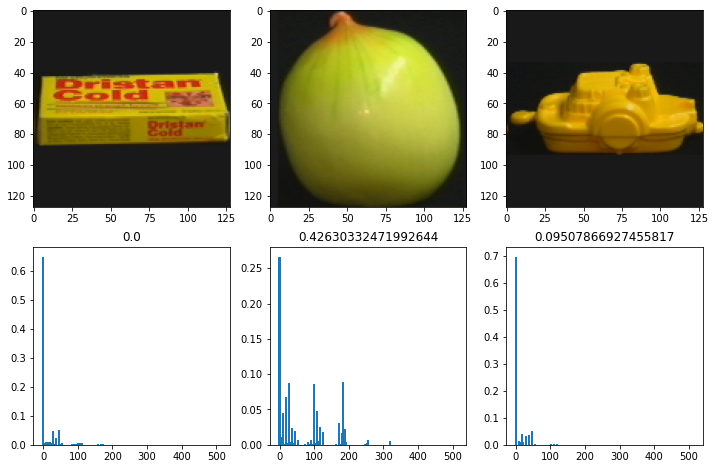

In [4]:
#1c
I1 = cv2.imread('dataset/object_01_1.png') #skatlica
I1 = cv2.cvtColor(I1, cv2.COLOR_RGB2BGR)
I2 = cv2.imread('dataset/object_02_1.png') #cebula
I2 = cv2.cvtColor(I2, cv2.COLOR_RGB2BGR)
I3 = cv2.imread('dataset/object_03_1.png') #rumen tankec
I3 = cv2.cvtColor(I3, cv2.COLOR_RGB2BGR)

H1 = myhist3(I1,8)
H2 = myhist3(I2,8)
H3 = myhist3(I3,8)

H1= H1.reshape(-1, order='F')
H2= H2.reshape(-1, order='F')
H3= H3.reshape(-1, order='F')
x = range(0,512)


L2_11 = compare_histograms(H1,H1,'L2')  #manjsi distance, vecja podobnost, sama s sabo je 0
L2_12 = compare_histograms(H1,H2,'L2')
L2_13 = compare_histograms(H1,H3,'L2')

print("\nchi: ")
print(compare_histograms(H1,H1,'chi'))  
print(compare_histograms(H1,H3,'chi'))

print("\nintersection: ")
print(compare_histograms(H1,H1,'intersection'))  
print(compare_histograms(H1,H2,'intersection'))
print(compare_histograms(H1,H3,'intersection'))

print("\nhellinger")
print(compare_histograms(H1,H1,'hellinger')) 
print(compare_histograms(H1,H2,'hellinger'))
print(compare_histograms(H1,H3,'hellinger'))

_, ax = plt.subplots(2, 3, figsize=(12, 8))
ax[0][0].imshow(I1)
ax[0][1].imshow(I2)
ax[0][2].imshow(I3)
ax[1][0].set_title(L2_11)
ax[1][1].set_title(L2_12)
ax[1][2].set_title(L2_13)
ax[1][0].bar(x,H1, width=6)
ax[1][1].bar(x,H2,width=6)
ax[1][2].bar(x,H3,width=6)
plt.show()


#Which image (object_02_1.png or object_03_1.png) is more similar to image object_01_1.png considering the L2 distance? How about the other three distances?
#We can see that all three histograms contain a strongly expressed component (one bin has a much higher value than the others). Which color does this bin represent?

# According to the Euclidean distance the second image is the most similar to the first one. But if we calculate for example chi-square distance, we see that the
# third image is the most similar.
# The higest value belongs to the black pixels that are located on the bin (0, 0, 0)

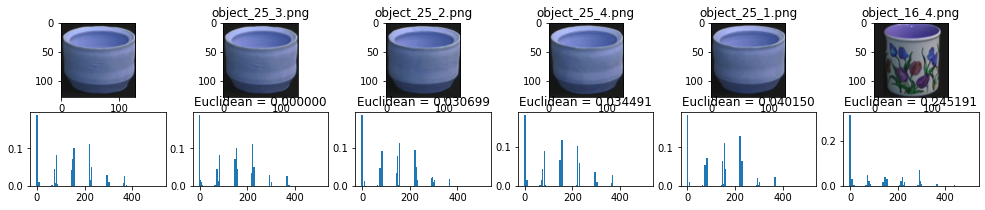

In [5]:
#1d
import os

# izracunamo histograme vseh slik v mapi dataset
def calcMoreHists(path, bins):
    listH = []
    for i in os.listdir(path):  #os.listdir() vrne vse imena datotek v diru kot string, npr 'img_0_1'
        I = cv2.imread('dataset/' + i)
        H = myhist3(I, bins)
        listH.append(H.reshape(-1))
    return listH

listH = calcMoreHists('dataset',8)


def compareSimilarity(I,histI,listH):
    #naredimo array v katerega ustavljamo vse distance do izbrane slike
    distanceArr = np.zeros((len(listH)))  # prazni array dolzine enake dolzini lista
    for i in np.arange(len(listH)):  #da ne vrne value listH-ja ampak stevec i
        distanceArr[i] = compare_histograms(histI, listH[i], 'L2')
    
    distanceIndexi = distanceArr.argsort()[:5]  # izbere 5 **INDEKSOV** najmanjsih vrednosti npr [5,4,3,7,1]

    _, ax = plt.subplots(2, 6, figsize=(17, 3))
    x = range(0,512)
    ax[0][0].imshow(I)
    ax[1][0].bar(x,histI, width=6)

    for i in np.arange(len(distanceIndexi)):  # i je od 0 do dolzine arraya [5,4,3,7,1]
        slika = os.listdir('dataset')[ distanceIndexi[i] ] #os.listdir() vrne vse imena datotek v diru in mi izberemo po indeksih
        ax[0][i+1].set_title(slika)
        ax[0][i+1].imshow( cv2.imread('dataset/' + slika ) )
        ax[1][i+1].set_title('Euclidean = %f' %(distanceArr[ distanceIndexi[i]]) )   #distanceArr[5] npr
        ax[1][i+1].bar(x, listH[ distanceIndexi[i] ], width=6)
    
    plt.show()
    

histSelected = listH[0]
imageSelected = cv2.imread('dataset/' + os.listdir('dataset')[0])

compareSimilarity(imageSelected,histSelected,listH)

#Which distance is in your opinion best suited for image retrieval? 
# In my opinion chi distance, because the image of yellow package(object1) is in my opinion more similar to the than yellow truck (object3)
# than to a yellow-green onion (object2)
# How does the retrieved sequence change if you use a different number of bins? Is the execution time affected by the number of bins?
# Yes computing a function with more bins requires more time

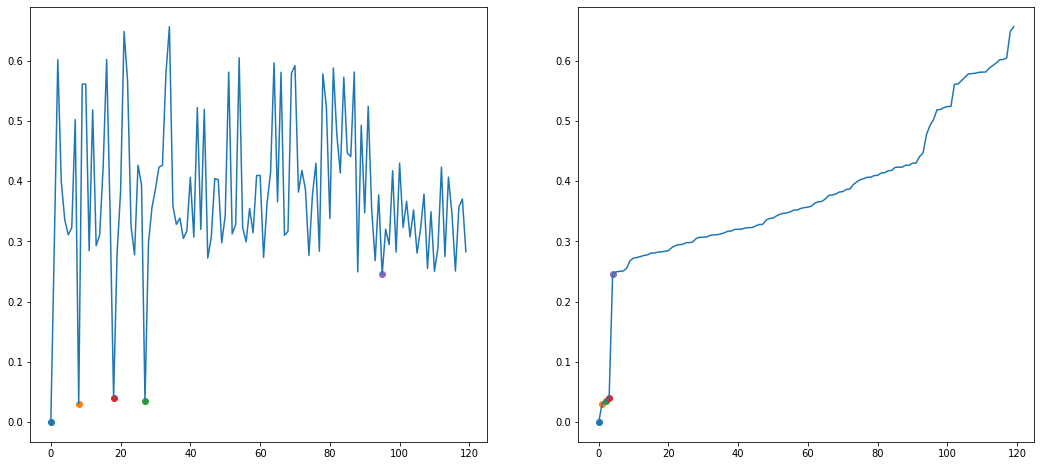

In [12]:
#1e
# prvi graf: x os so indeksi vseh slik, y os so distances, najmanjsi distance (torej oznacene pikice), najbolj podoben
# drugi graf: x os so vsi indeksi slik a sortirani, y os so oznacene najblizje dolzine 

def compareSimilarityGraf(I,histI,listH):
    distanceArr = np.zeros((len(listH)))  # prazni array dolzine enake dolzini lista
    for i in np.arange(len(listH)):  #da ne vrne value listH-ja ampak stevec i
        distanceArr[i] = compare_histograms(histI, listH[i], 'L2')
    
    distanceIndexi = distanceArr.argsort()[:5]  # izbere 5 INDEKSOV najmanjsih vrednosti npr [5,4,3,7,1]
    distanceSorted = np.sort(distanceArr)

    _, ax = plt.subplots(1, 2, figsize=(18, 8),squeeze=False)
    x = range(0,len(distanceArr))
    ax[0][0].plot(x,distanceArr)
    
    for i in np.arange(len(distanceIndexi)): # 5 najblizjih, npr [5,4,3,7,1], i gre od 0 do 4 npr
        ax[0][0].scatter(distanceIndexi[i],distanceArr[distanceIndexi[i]]) # distanceArr ima vse dolzine, distanceArr[5] -> najmanjsa dolzina
        ax[0][1].scatter(i,distanceSorted[i]) #distanceSorted so vse ampak sorted



 
    ax[0][1].plot(x,distanceSorted)
    plt.show()

histSelected = listH[0]
imageSelected = cv2.imread('dataset/' + os.listdir('dataset')[0])

compareSimilarityGraf(imageSelected,histSelected,listH)


In [14]:
#2a

# 1. flip the kernel
# 2. postavi ga na zacetek signala
# 3. za posamezni zamik izracunas skalarni produkt, torej pomnozis istolezne elemente in jih sestejes

f = np.array([0,1,1,1,0,0.5,0.7,0.2,0,0,1,0])
k = np.array([0.5,1,0.3])
kObrnen = np.array([0.3, 1, 0.5])
conv = np.zeros(len(f))
conv[0] = 0.3 * 0 + 1 * 0 + 0.5 * 0
conv[1] = 0.3*  0  +1*  0  +0.5*  1
conv[2] = 0.3*  0  +1*  1  +0.5*  1
conv[3] = 0.3*  1  +1*  1  +0.5*  1
conv[4] = 0.3*  1  +1*  1  +0.5*  0
conv[5] = 0.3*  1  +1*  0  +0.5*  0.5
conv[6] = 0.3*  0  +1*  0.5  +0.5*  0.7
conv[7] = 0.3*  0.5  +1*  0.7  +0.5*  0.2
conv[8] = 0.3*  0.7  +1*  0.2  +0.5*  0
conv[9] = 0.3*  0.2  +1*  0  +0.5*  0
conv[10] = 0.3*  0  +1*  0  +0.5*  1
conv[11] = 0.3*  0  +1*  1  +0.5*  0

print(conv)

[0.   0.5  1.5  1.8  1.3  0.55 0.85 0.95 0.41 0.06 0.5  1.  ]


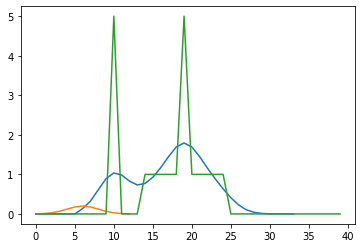

In [19]:
#2b

def read_data(filename):
	# reads a numpy array from a text file
	with open(filename) as f:
		s = f.read()

	return np.fromstring(s, sep=' ')


def simple_convolution(I,k):
    N = (k.shape[0] - 1) / 2
    
    conv = np.zeros(int(I.shape[0] - N))

    for i in np.arange( N,(I.shape[0] - N) ):
        odsek = I[ int(i-N) : int(i+N+1) ]
        conv[int(i)] = sum(odsek * k )

    plt.plot(np.arange(len(conv)), conv) # konvolucija: modra
    plt.plot(np.arange(len(k)), k)  # kernel: oranzen
    plt.plot(np.arange(len(I)), I) # signal: zelen
    plt.show()


I = read_data('signal.txt')
k = read_data('kernel.txt')
simple_convolution(I,k)

# Can you recognize the shape of the kernel? 
# Yes, this is a gaussian kernel wtih a large sigma
# What is the sum of the elements in the kernel? 
# The sum is one.
# How does the kernel affect the signal?
# Gaussian filter makes an average of all the pixels in a kernel but accounts for the fact that the pixel in the middle of the kernel has a
# higher contribution than the pixels on the side of the kernel. Hence it produces a bluring effect more accurately.

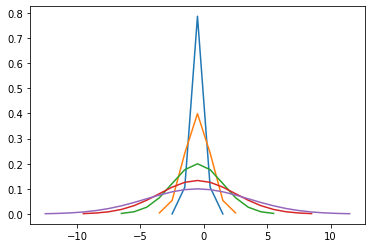

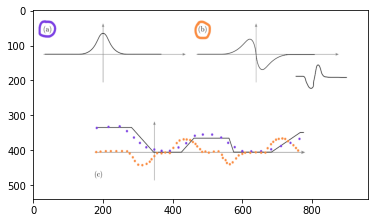

In [25]:
import math
#2d
# 1. naredimo vektor x sirine -3*sigma do 3*sigma, npr [-3, -2, -1, 0, 1, 2, 3]
# 2. vektor pluggamo v formulco za gaussa
# 3. dobimo nov vektor g z vrednostmi enakimi gaussu 
# 4. normaliziramo z vsoto vseh elementov g-ja
# majhna sigma, ozek vrh

def gauss(sigma):

    x = np.arange( round((-3*sigma)) , round((3*sigma))+1,1 )  # nasa x os, sega od -3*sigma do 3*sigma, step = 1 [-9,-8,...,9]

    g = ( 1/(math.sqrt(2*math.pi)*sigma) )*math.e**(( -(x)**2 ) / (2*sigma**2)) # g je vektor, prvic da x[0] notr, pol x[1]...

    g = g/sum(g)   #normalizacija
 
    return g

sigmas = np.array([0.5,1,2,3,4])
for i in sigmas:
    g = gauss(i)
    plt.plot(np.arange( (-len(g)/2),(len(g)/2) ), g)  #da izrisujemo od -g/2 do g/2, da je vrh na sredini

plt.show()


# gaussian naredi smoothing:
#   npr: gauss: [0.1  1  0.1], signal: [1 2 3], conv: [2.4]

# kernel dva naredi kot odvod torej ce je konstanten signal ne naredi nic, ce pada je conv negativna, ce narasca, pozitina
#   npr: kernel: [-3  0  3], signal: [1 2 3], conv: [(-9 + 3)]= [-7]
drawn = cv2.imread('convDraw.png') 
plt.imshow(drawn)
plt.show()


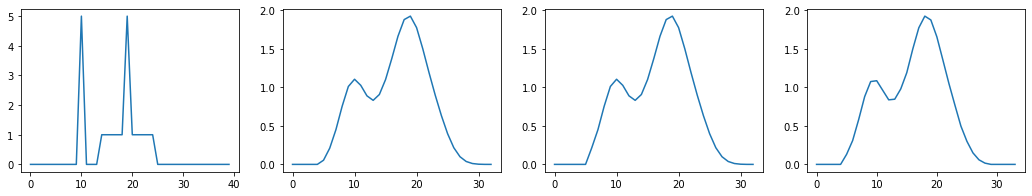

In [26]:
#2e
def simple_convolution(I,k):
    N = (k.shape[0] - 1) / 2
  
    
    conv = np.zeros(int(I.shape[0] - N))

    
    for i in np.arange( N,(I.shape[0] - N) ):
       
        odsek = I[ int(i-N) : int(i+N+1) ]
     


        conv[int(i)] = sum(odsek * k )
    return conv




I = read_data('signal.txt')
k1 = gauss(2)
k2 = np.array([0.1,0.6,0.4])
conv1 = simple_convolution( simple_convolution(I,k1), k2 )
conv2 = simple_convolution( simple_convolution(I,k2), k1 )
conv3 = simple_convolution( I, simple_convolution(k1,k2) )


_, ax = plt.subplots(1, 4, figsize=(18, 3),squeeze=False)

ax[0][0].plot(np.arange(len(I)),I)
ax[0][1].plot(np.arange(len(conv1)),conv1)
ax[0][2].plot(np.arange(len(conv2)),conv2)
ax[0][3].plot(np.arange(len(conv3)),conv3)
plt.show()      

# vsi trije grafi so isti ne glede na vrstni red. zato lahko pri konvoluciji najprej pomnozimo filtre in potem sele s signalom
#meanwhile tega pri korelaciji ne moramo

/var/folders/jz/sl6_lyb922s5lryqsqg5hx6r0000gn/T/ipykernel_51303/636665662.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
/var/folders/jz/sl6_lyb922s5lryqsqg5hx6r0000gn/T/ipykernel_51303/636665662.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


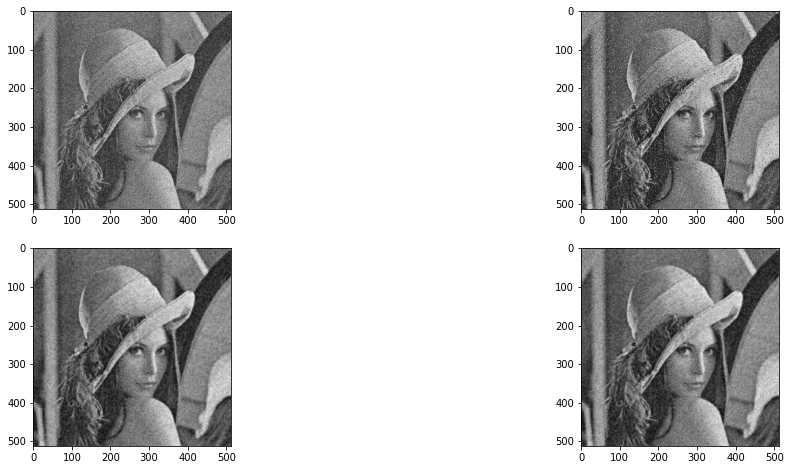

In [54]:
#3a
from a2_utils import *
def noisy(noise_typ,image):
   if noise_typ == "s&p":
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.08
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1
      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

def gaussFilter(I):
        g1D = gauss(1)
        g1D = np.array([g1D])
        
        g1Dtrans = np.transpose(g1D)
        conv1 = cv2.filter2D(Inoise, -1, g1D)
        conv2 = cv2.filter2D((conv1), -1, g1Dtrans)
        return conv2

I = plt.imread('images/lena.png')
I = cv2.cvtColor(I, cv2.COLOR_RGB2BGR)
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

Inoise = gauss_noise(I,0.5)
Isp = noisy("s&p", I)

InoiseFix = gaussFilter(Inoise)
IspFix = gaussFilter(Isp)

_, ax = plt.subplots(2, 2, figsize=(18, 8),squeeze=False)

ax[0][0].imshow(Inoise, cmap='gray')
ax[0][1].imshow(Isp,cmap='gray')
ax[1][0].imshow(InoiseFix,cmap='gray')
ax[1][1].imshow(IspFix,cmap='gray')
plt.show()

# Which noise is better removed using the Gaussian filter?
# the noisy image.

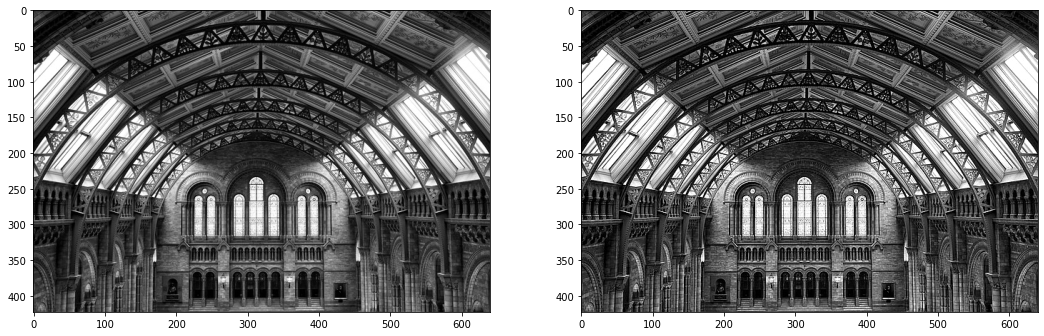

In [50]:
#3b


def sharpen(I):
    kernelS = np.array([[-0.11, -0.11, -0.11],[-0.11, 1.89, -0.11],[-0.11, -0.11, -0.11]])
    out = cv2.filter2D(I,-1,kernelS)
    return out


# dvakratna slika - povprecje/blur je sharpening
# (I conv 2) - (I conv povp)

# A = np.zeros((10, 10))
# A[2:8, 2:8] = 1
# x = np.arange(A.shape[0])
# y = np.arange(A.shape[1])
# x, y = np.meshgrid(x, y)

# u = [1, 0, -1]
# v = [1, 2, 1]

# Ch = conv2(u, v, A, 'same')
# Cv = conv2(v, u, A, 'same')

# import matplotlib.pyplot asplt
# from mpl_toolkits.mplot3d import Axes3D

# plt.figure()
# ax = plt.gca(projection='3d')
# ax.plot_surface(x, y, Ch)

# plt.figure()
# ax = plt.gca(projection='3d')
# ax.plot_surface(x, y, Cv)

# a = np.array([[-0.11,-0.11,-0.11],[-0.11,1.89,-0.11],[-0.11,-0.11,-0.11]], np.double)
# a = np.flipud(np.fliplr(a))

# b = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]], np.double)
# b = np.flipud(np.fliplr(b))

# out = cv2.filter2D(I,-1,a)

I = cv2.imread('images/museum.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

out = sharpen(I)
# I = I.astype("float32")
# m = cv2.filter2D(I, -1, c, borderType=cv2.BORDER_CONSTANT)
# n = cv2.filter2D(I, -1, b,borderType=cv2.BORDER_CONSTANT)
# sk = m-n

 

_, ax = plt.subplots(1, 2, figsize=(18, 8),squeeze=False)

ax[0][0].imshow(I, cmap='gray')
ax[0][1].imshow(out,cmap='gray')
plt.show()

Text(0.5, 1.0, 'median')

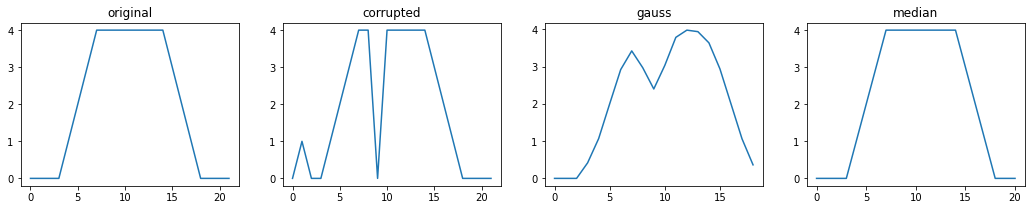

In [28]:
#3c
import math

#mediana da vrednosti po vrsti in izbere sredinsko, 1 2 5 -> 2,    1 2 5 66 -> (2+5)/2
# vecje okno zajame vec nicel in je lahko mediana zjebana ko da stevilke po vrsti OG=10230 -> mediana=00123 m=1 
#  okno mora biti torej manjse kot je razdalja med enim in drugim sumom, zato da nikoli ne zajame dva suma
def simple_median(I,okno):

    #make a convolution but with median, jedro je 1D gauss, namest sum/vsota je median
    #naredimo identicno okno [1 1 1]
    k = np.ones(okno)
    # kje zacnemo, torej tko da se lih pokrije, ce je signal 1 2 3 4 5 in okno 1 1 1 zacnemo pri 2, N = 2
    N = (len(k) - 1) / 2
    # inicializiramo matriko konvolucija ki je slika po conv 
    conv = np.zeros(int(I.shape[0] - N))
    #naredimo konv z matriko k in signalom I, gremo od N do length-N, torej od 2 do 3
    for i in np.arange( N,(I.shape[0] - N) ):
        #naredimo odsek signala ki je dolg isto kot k, gre od 0 do 
        odsek = I[ int(i-N) : int(i+N+1) ]
        # polnimo matriko conv z vrednostmi mediane torej  1 2 3 -> 2
        conv[int(i)] = np.median(odsek * k )
    return conv

def simple_convolutionWithReturn(I,k):
    N = (k.shape[0] - 1) / 2
    conv = np.zeros(int(I.shape[0] - N))
    for i in np.arange( N,(I.shape[0] - N) ):
        odsek = I[ int(i-N) : int(i+N+1) ]
        conv[int(i)] = sum(odsek * k )
    return conv


s = np.array([0,0,0,0,1,2,3,4,4,4,4,4,4,4,4,3,2,1,0,0,0,0])
sSalty = np.array([0,1,0,0,1,2,3,4,4,0,4,4,4,4,4,3,2,1,0,0,0,0])
gaussMatrika1D = gauss(1)
sGauss = simple_convolutionWithReturn(sSalty, gaussMatrika1D)
sMedian = simple_median(sSalty,3)  

_, ax = plt.subplots(1, 4, figsize=(18, 3),squeeze=False)
ax[0][0].plot(range(len(s)),s)
ax[0][0].set_title("original")
ax[0][1].plot(range(len(sSalty)),sSalty)
ax[0][1].set_title("corrupted")
ax[0][2].plot(range(len(sGauss)),sGauss)    #gauss sirok sigma=1 torej 3*sigma, od -3 do 3
ax[0][2].set_title("gauss")
ax[0][3].plot(range(len(sMedian)),sMedian)
ax[0][3].set_title("median")


# Which filter performs better at this specific task? 
#    median, bc unlike gauss it doesnt calculate the average of all the values, but takes just the middle one so that the noise cant 
#  mess with the final value
#  In comparison to Gaussian filter that can be applied multiple times in any order, does the order matter in case of median filter?
#    order does matter in the case of median filter because the filter cannot be reversed once applied. You lose the original values.

